# geometría visual

Las transformaciones más importantes de la geometría visual pueden expresarse de forma lineal (multiplicando por una determinada matriz) usando coordenadas homogéneas.

Se organizan en grupos progresivamente más generales:

<img src="../images/demos/transf2d.svg" width="600px"/>

Los desplazamientos y rotaciones producen transformaciones euclídeas.

$$ D(d_x,d_y) \equiv
  \begin{bmatrix}1 & 0 & d_x\\
                 0 & 1 & d_y\\
                 0 & 0 & 1  \end{bmatrix}\quad
  \quad
  R(\alpha)\equiv\begin{bmatrix}\cos(\alpha) & -\sin(\alpha) & 0\\
                 \sin(\alpha) & \cos(\alpha) & 0\\
                 0 & 0 & 1  \end{bmatrix}$$
                 
Los escalados producen transformaciones similares.

$$
S(s)\equiv \begin{bmatrix}s & 0 & 0\\
                 0 & s & 0\\
                 0 & 0 & 1  \end{bmatrix}$$
                 
Los escalados no uniformes producen transformaciones afines.

$$
S(s_x,s_y)\equiv\begin{bmatrix}  s_x & 0 & 0\\
                 0 & s_y & 0\\
                 0 & 0 & 1  \end{bmatrix}$$


La composición de transformaciones equivale al producto de matrices. El grupo afín tiene la estructura siguiente, donde la coordenada homogénea realmente no se utiliza.

$$
\begin{bmatrix}  x & x & x\\
                 x & x & x\\
                 0 & 0 & x  \end{bmatrix}$$
                 

En las transformaciones con efecto de perspectiva aparecen los 9 elementos.

$$
\begin{bmatrix}  x & x & x\\
                 x & x & x\\
                 x & x & x  \end{bmatrix}$$

Las transformaciones euclídeas matienen las **distancias** entre puntos.

Las similares mantienen los **ángulos** (y ratios de distancias).

Las afines mantienen el **paralelismo** (y ratios de áreas, y ratios de distancias en la misma dirección).

Las proyectivas mantienen las **líneas rectas** y el **cross-ratio** de cuatro puntos en una recta.

<img src="../images/demos/cross-ratio.png"/>

$$\rho= \frac{a}{a+b} \; \frac{c}{c+b}$$

Las transformaciones de *perspectiva* que observamos en las imágenes de un plano tomadas con una cámara "normal" son un caso especial de las proyectivas.

## bibliotecas

In [1]:
import numpy as np
import cv2   as cv

import matplotlib.pyplot as plt
import numpy.linalg      as la

from matplotlib.pyplot   import imshow, subplot, title, plot

from ipywidgets          import interactive

%matplotlib inline

def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread('../images/'+file), cv.COLOR_BGR2RGB) 

def rgb2gray(x):
    return cv.cvtColor(x,cv.COLOR_RGB2GRAY)

def imshowg(x):
    imshow(x, "gray")

# para imprimir arrays con el número de decimales deseados
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    yield 
    np.set_printoptions(**original)

def sharr(a, prec=3):
    with printoptions(precision=prec, suppress=True):
        print(a)
    
# muestra un polígono cuyos nodos son las filas de un array 2D
def shcont(c, color='blue', nodes=True):
    x = c[:,0]
    y = c[:,1]
    x = np.append(x,x[0])
    y = np.append(y,y[0])
    plot(x,y,color)
    if nodes: plot(x,y,'.',color=color, markerSize=11)


## herramientas

In [2]:
# crea un vector (array 1D)
def vec(*argn):
    return np.array(argn)

# convierte un conjunto de puntos ordinarios (almacenados como filas de la matriz de entrada)
# en coordenas homogéneas (añadimos una columna de 1)
def homog(x):
    ax = np.array(x)
    uc = np.ones(ax.shape[:-1]+(1,))
    return np.append(ax,uc,axis=-1)

# convierte en coordenadas tradicionales
def inhomog(x):
    ax = np.array(x)
    return ax[..., :-1] / ax[...,[-1]]

In [3]:
# aplica una transformación homogénea h a un conjunto
# de puntos ordinarios, almacenados como filas 
def htrans(h,x):
    return inhomog(homog(x) @ h.T)

def desp(d):
    dx,dy = d
    return np.array([
            [1,0,dx],
            [0,1,dy],
            [0,0,1]])

def scale(s):
    sx,sy = s
    return np.array([
            [sx,0,0],
            [0,sy,0],
            [0,0,1]])

# rotación eje "vertical" del plano
def rot3(a):
    c = np.cos(a)
    s = np.sin(a)
    return np.array([
            [c,-s,0],
            [s, c,0],
            [0, 0,1]])

pi = np.pi
degree = pi/180

## grupos de transformaciones

Creamos una figura de referencia para ver el resultado de diferentes transformaciones.

In [4]:
ref = np.array(
   [[0,   0  ],
    [0,   1  ],
    [0.5, 1  ],
    [0.5, 0.5],
    [1,   0.5],
    [1,   0  ]])

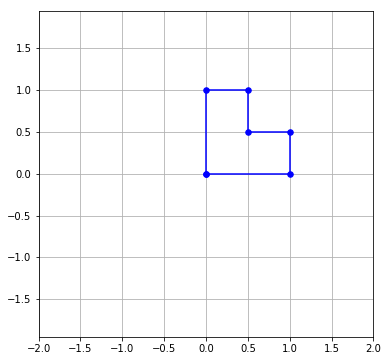

In [5]:
fig(6,6); 
shcont(ref); plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid();

Podemos observar interactivamente el efecto de un desplazamiento:

In [6]:
# >jupyter nbextension enable --sys-prefix --py widgetsnbextension

def fun(a = 0):
    H = desp((a,0))
    img = htrans(H,ref)
    
    fig(12,6)
    subplot(1,2,1)
    shcont(ref)
    plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid()
    
    subplot(1,2,2)
    shcont(img,color='red')
    plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid()

interactive(fun, a=(-1,1,0.1))

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

Normalmente el plano transformado es distinto del inicial, aunque para comparar el efecto de algunas transformaciones podemos dibujarlas juntas:

In [7]:
def fun(a = 0.2):
    H = desp((a,0))
    img = htrans(H,ref)
    
    fig(6,6)
    shcont(ref)
    shcont(img,color='red')
    plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid()

interactive(fun, a=(-1,1,0.1))

interactive(children=(FloatSlider(value=0.2, description='a', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

Ahora comprobamos el efecto de un escalado.

In [8]:
def fun(a = 1.6):
    H = scale((a,a))
    img = htrans(H,ref)
    
    fig(6,6)
    shcont(ref)
    shcont(img,color='red')
    plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid()

interactive(fun, a=(0,2,0.2))

interactive(children=(FloatSlider(value=1.6, description='a', max=2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

Si queremos escalar desde otro punto tenemos que trasladar la imagen, escalar y devolverla a su posición inicial. Esto ilustra también la composición de transformaciones. 

In [9]:
def fun(a = 1.6):
    H = desp((0.5,0.5)) @ scale((a,a)) @ desp(-vec(0.5,0.5))
    img = htrans(H,ref)
    
    fig(6,6)
    shcont(ref)
    shcont(img,color='red')
    plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid()

interactive(fun, a=(0,2,0.2))

interactive(children=(FloatSlider(value=1.6, description='a', max=2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

Las transformaciones "similares" combinan desplazamientos, rotaciones y escalados uniformes:

In [10]:
def fun(s = 1.6, a = 30):
    H = desp(-vec(1,1)/2) @ scale((s,s)) @ rot3(a*degree) @ desp(-vec(0.5,0.5))
    img = htrans(H,ref)
    
    fig(6,6)
    shcont(ref)
    shcont(img,color='red')
    plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid()

interactive(fun, s=(0,2,0.1), a=(-180,180,10))

interactive(children=(FloatSlider(value=1.6, description='s', max=2.0), IntSlider(value=30, description='a', max=180, min=-180, step=10), Output()), _dom_classes=('widget-interact',))

Si realizamos un escalado no uniforme obtenemos una **transformación afín**, que permite aproximar las vistas en *perspectiva débil* (objetos alejados de la cámara).

In [11]:
def fun(a = 40, s = 1.4, sr = 0.4):
    H   = desp((0.5,0.5)) @ scale((s,s*sr)) @ rot3(a*degree)  @ desp(-vec(0.5,0.5))
    print(H)
    img = htrans(H,ref)
    
    fig(6,6)
    shcont(ref)
    shcont(img,color='red')
    plt.axis('equal'); plt.axis([-2,2,-2,2]); plt.grid()

interactive(fun, a=(-180,180,10), s=(0,2,0.2), sr=(0,2,0.2))

interactive(children=(IntSlider(value=40, description='a', max=180, min=-180, step=10), FloatSlider(value=1.4, description='s', max=2.0, step=0.2), FloatSlider(value=0.4, description='sr', max=2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

Este tipo de aproximación es útil en algunas aplicaciones, pero no completamente realista: no tiene puntos de fuga de las rectas paralelas.

Finalmente, el efecto perspectiva real se puede observar con la siguiente transformación (conseguida con un modelo de cámara que veremos el próximo día).

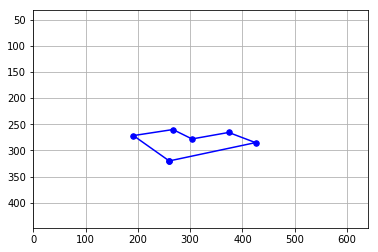

In [12]:
H = np.array([[250,-11, 260],
              [22,  33, 320],
              [0.2,  0.3, 1]])

img = htrans(H,ref)

shcont(img)
plt.axis('equal'); plt.ylim(480,0); plt.xlim(0,640); plt.grid()

La matriz de transformación es del grupo **proyectivo**, no tiene ninguna restricción en sus 9 elementos.

## estimación de transformaciones

Un problema clave de la geometría visual es encontrar la transformación proyectiva que relaciona dos conjuntos de puntos. En principio, esto implica resolver un determinado [sistema de ecuaciones](sistecs.ipynb). (Como veremos [más adelante](DLT.ipynb), es posible escribir una función sencilla que resuelve este problema.) En la práctica es recomendable usar la función de OpenCV `findHomography`. (La palabra *homography* significa "transformación proyectiva" (transformación lineal de coordenadas homogéneas $\simeq$ matriz $3\times 3$.)

Comprobamos que funciona bien con los datos del ejemplo artificial anterior. Sabemos que los puntos

In [13]:
img

array([[ 260.        ,  320.        ],
       [ 191.53846154,  271.53846154],
       [ 267.14285714,  260.        ],
       [ 303.6       ,  278.        ],
       [ 373.7037037 ,  265.55555556],
       [ 425.        ,  285.        ]])

son el resultado de aplicar

In [14]:
sharr(H)

[[ 250.   -11.   260. ]
 [  22.    33.   320. ]
 [   0.2    0.3    1. ]]


a los puntos

In [15]:
ref

array([[ 0. ,  0. ],
       [ 0. ,  1. ],
       [ 0.5,  1. ],
       [ 0.5,  0.5],
       [ 1. ,  0.5],
       [ 1. ,  0. ]])

Efectivamente recuperamos la transformación a partir de los puntos correspondientes:

In [16]:
He, mask = cv.findHomography(ref, img)

sharr(He)

[[ 250.   -11.   260. ]
 [  22.    33.   320. ]
 [   0.2    0.3    1. ]]


También devuelve un array "mask" indicando las correspondencias que se consideran correctas, ya que `findHomography` puede, opcionalmente, aplicar técnicas de estimación robusta capaces de tolerar correspondencias erróneas.

## rectificación de planos

Si descubrimos en una imagen plana 4 ó más puntos cuyas posición real es conocida podemos obtener la transformación que se ha producido y "deshacerla".

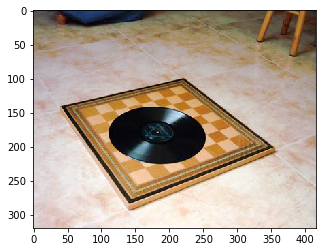

In [17]:
img = readrgb('disk1.jpg')

imshow(img);

El análogo a `htrans` para imágenes completas es `cv.warpPerspective`. Podemos probar algunas transformaciones:

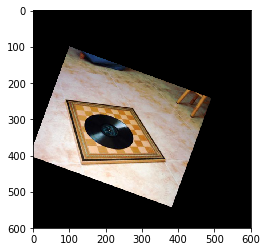

In [18]:
rec = cv.warpPerspective(
    img,
    desp(vec(100.,100.)) @ rot3(20*degree),
    (600,600))

imshow(rec);    

La que nos interesa es la que convierte la imagen del tablero de ajedrez en un cuadrado. Para no complicar ahora mucho el ejemplo, encontramos por prueba y error las coordenadas aproximadas de las esquinas del tablero:

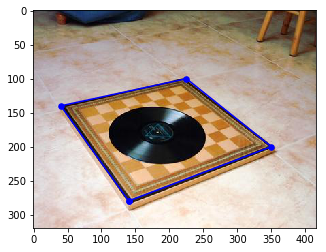

In [19]:
view = np.array([
        [140,280],
        [40,140],
        [225,100],
        [350,200]])

imshow(img);
shcont(view)

Un cuadrado de referencia tiene, p. ej., las siguientes coordenadas: 

In [20]:
square = np.array([[0,0],[1,0],[1,1],[0,1]])

Este cuadro unidad es muy pequeño para una imagen medida en pixels, lo ampliamos y centramos un poco para que quede bien en la imagen rectificada. (Podríamos modificar manualmente la celda anterior, pero es preferible aplicar una transformación para poder cambiar cómodamente posición y tamaño.)

In [21]:
dst = htrans(desp(vec(50,80)) @ scale((100,100)), square)
dst

array([[  50.,   80.],
       [ 150.,   80.],
       [ 150.,  180.],
       [  50.,  180.]])

In [22]:
H,_ = cv.findHomography(view, dst)

sharr(H)

[[  -0.353   -0.659  334.276]
 [   0.544   -0.112  115.368]
 [  -0.001    0.004    1.   ]]


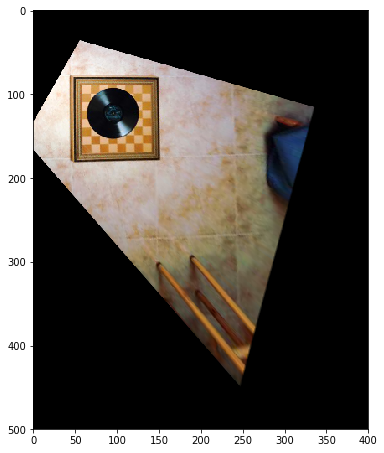

In [23]:
rec = cv.warpPerspective(img,H,(400,500))

fig(6,8)
imshow(rec);    

Hay que ajustar el desplazamiento, escalado y tamaño de imagen destino para que quede bien.

La imagen rectificada pierde precisión a medida que nos alejamos de los puntos de referencia.

Hemos estimado directamente la transformación de rectificación (imagen $\rightarrow$ referencia). También se puede estimar la transformación de perspectiva sufrida (referencia $\rightarrow$ imagen) y aplicar su inversa.

In [24]:
H,_ = cv.findHomography(dst, view)
H = la.inv(H)
sharr(H)

[[  -0.11    -0.205  103.866]
 [   0.169   -0.035   35.847]
 [  -0.       0.001    0.311]]


No es la misma matriz (tiene un factor de escala global distinto) pero es la misma transformación. Si ajustamos la escala poniendo un uno en el mismo elemento comprobamos que los demás elementos son iguales (salvo errores de redondeo).

In [25]:
sharr(H/H[2,2])

[[  -0.353   -0.659  334.276]
 [   0.544   -0.112  115.368]
 [  -0.001    0.004    1.   ]]


## mosaico de imágenes

Las vistas de un plano desde diferentes puntos de vista están relacionadas por una homografía, como acabamos de ver.

Se puede comprobar que las imágenes del mundo 3D tomadas desde la misma posición también se relacionan mediante homografías planas. Esto nos permite hacer un mosaico, "pegando" todas en un marco de referencia común.

Vamos a intentar encontrar automáticamente las homografías utilizando puntos de interés y sus descriptores como vimos en una clase anterior.

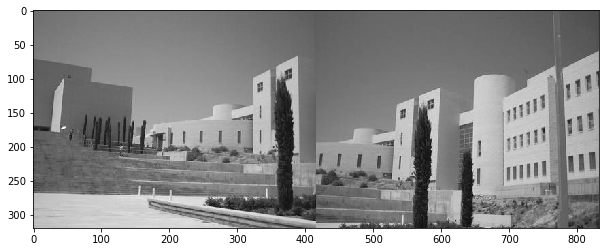

In [26]:
rgb1 = readrgb('pano/pano001.jpg')
rgb2 = readrgb('pano/pano002.jpg')

x1 = rgb2gray(rgb1)
x2 = rgb2gray(rgb2)

fig(12,4)
imshowg(np.hstack([x2,x1]));

In [27]:
sift = cv.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(x1, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

# kps: 629, descriptors: (629, 128)


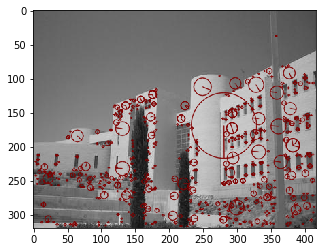

In [28]:
imshow( cv.drawKeypoints(image=x1,
                         outImage=None,
                         keypoints=kps,
                         flags=4, color = (128,0,0)) );

In [29]:
(kps2, descs2) = sift.detectAndCompute(x2, None)
descs2.shape

(585, 128)

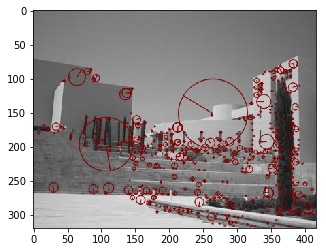

In [30]:
imshow( cv.drawKeypoints(image=x2,
                         outImage=None,
                         keypoints=kps2,
                         flags=4, color = (128,0,0)) );

In [31]:
bf = cv.BFMatcher()

matches = bf.knnMatch(descs2,descs,k=2)

len(matches)

585

154


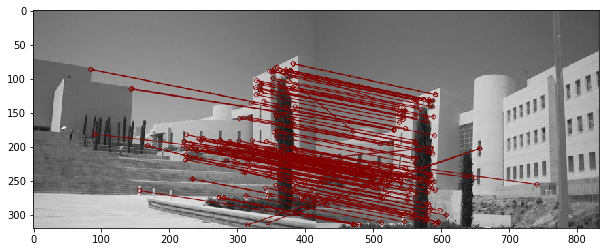

In [32]:
# para quedarnos solo los que tienen muy poca ambigüedad.

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

print(len(good))
        
# drawMatches usa la estructura matches1to2
img3 = cv.drawMatches(x2,kps2,
                      x1,kps,
                      good,
                      flags=2,outImg=None,
                      matchColor=(128,0,0))
fig(12,4)
plt.imshow(img3);

Se han encontrado muchas correspondencias pero algunas son incorrectas. Necesitaremos una técnica de estimación robusta como [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus). ("*random sample consensus*", que prueba muchas hipótesis y se queda con la que tiene más correspondencias compatibles).

In [33]:
# a partir de los matchings seleccionados construimos los arrays de puntos que necesita findHomography
src_pts = np.array([ kps [m.trainIdx].pt for m in good ]).astype(np.float32).reshape(-1,2)
dst_pts = np.array([ kps2[m.queryIdx].pt for m in good ]).astype(np.float32).reshape(-1,2)

In [34]:
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 3) # cv.LMEDS

In [35]:
sharr(H)

[[   0.789    0.087  200.27 ]
 [  -0.145    0.965  -22.335]
 [  -0.001    0.       1.   ]]


Por curiosidad podemos ver las correspondencias que el método RANSAC considera correctas (aunque no hacen falta para nada más).

In [36]:
# mask viene como una array 2D de 0 ó 1, lo convertimos a un array 1D de bool
matchesMask = mask.ravel()>0

ok = [ good[k] for k in range(len(good)) if matchesMask[k] ]

# good es una lista, si fuera un array prodríamos hacer directamente
# ok = good[matchesMask]

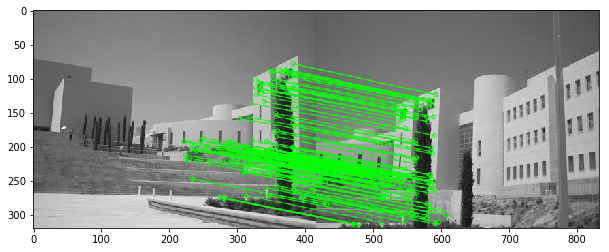

In [37]:
img4 = cv.drawMatches(x2,kps2,x1,kps,ok,flags=2,outImg=None,matchColor=(0,255,0))

fig(12,4)
plt.imshow(img4);

El paso siguiente es llevar todas las imágenes a un marco común con espacio suficiente. Para ello podemos usar la siguiente función auxiliar:

In [38]:
def t(h,x):
    return cv.warpPerspective(x, desp((100,150)) @ h,(1000,600))

La imagen "base" queda así:

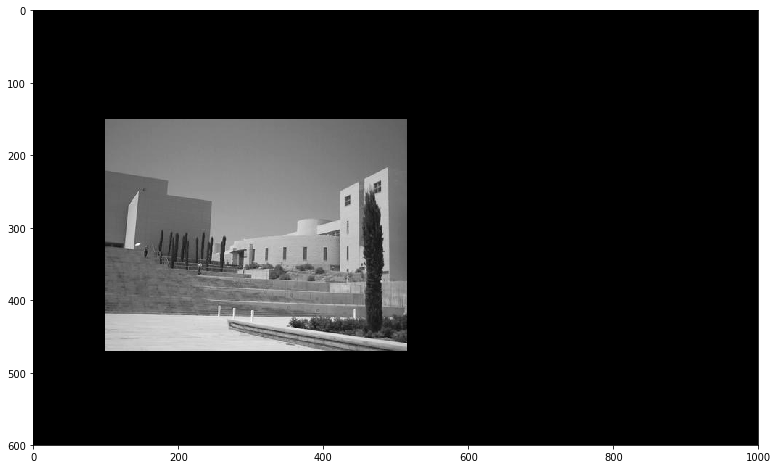

In [39]:
fig(15,8)

imshowg(t(np.eye(3),x2))

Y la otra queda transformada para coincidir en la zona común:

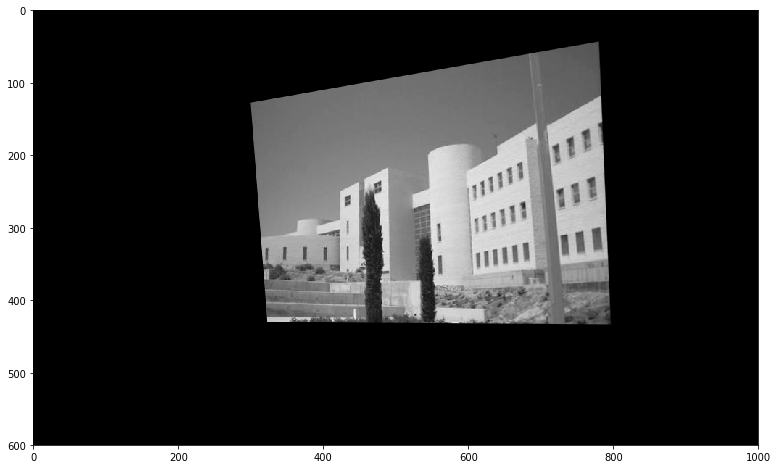

In [40]:
fig(15,8)

imshowg(t(H,x1))

Una forma rápida de combinar las dos es tomar el máximo:

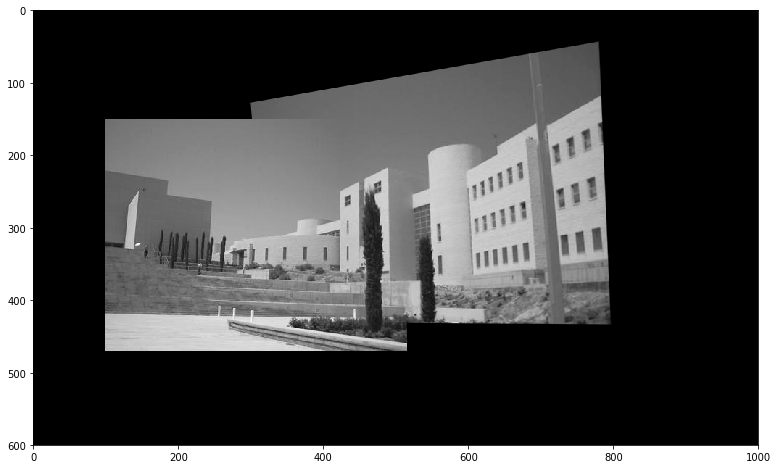

In [41]:
fig(15,8)

imshowg(np.maximum(t(np.eye(3),x2), t(H,x1)));

También funciona en color.

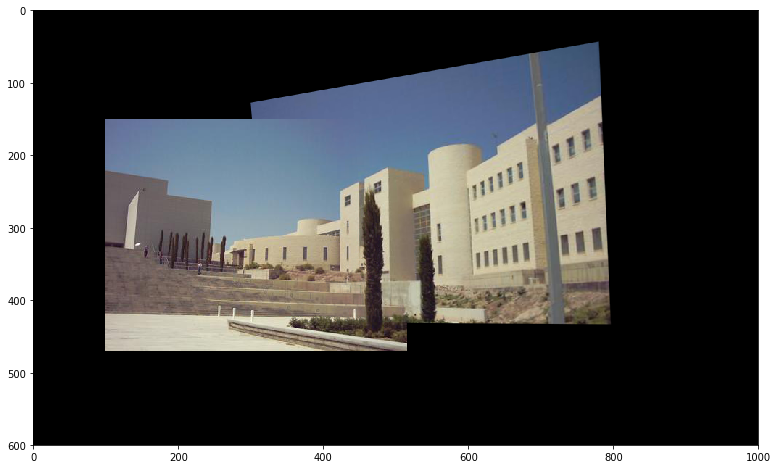

In [42]:
fig(15,8)

imshow(np.maximum(t(np.eye(3),rgb2), t(H,rgb1)));

En la colección de imágenes tenemos 7 vistas (pano/pano001.jpg ... pano/pano007.jpg) que pueden usarse para hacer un mosaico más grande. Pero ¡ojo! cuando el panorama abarca un ángulo grande la distorsión se hace enorme y es necesario recurrir a una proyección cilíndrica.

Aquí podemos encontrar un documento interesante sobre la construcción de [panoramas](https://graphics.stanford.edu/courses/cs448a-10/kari-panoramas-02mar10-opt.pdf), y un [applet](https://graphics.stanford.edu/courses/cs178/applets/projection.html) de demostración.

Experimentos:

- cross-ratio para predecir la posición de puntos equiespaciados.

- rectificar fotos de campos de fútbol, tenis, etc. y medir distancias.

- llevar un cuadrángulo a otro

- invariante de 4+1 puntos

- comprobar transformación de rectas y cónicas

- pensar en invariante a transformación similar